In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("../../Downloads/spam.csv",encoding='ISO-8859-1')

In [5]:
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df=df.rename(columns={'v1':'TARGET','v2':'MESSAGE'})

In [10]:
df

,TARGET,MESSAGE
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TARGET']=encoder.fit_transform(df['TARGET'])
df['TARGET']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: TARGET, Length: 5169, dtype: int64

In [17]:
df.head()

,TARGET,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


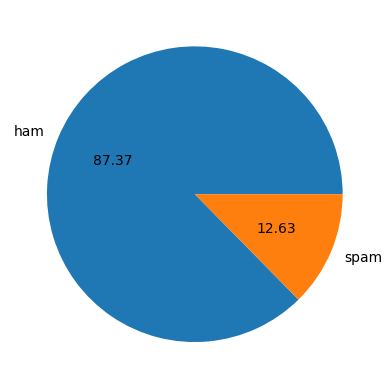

In [18]:
plt.pie(df["TARGET"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
x=df['MESSAGE']
y=df['TARGET']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [23]:
cv=CountVectorizer()

In [24]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.fit_transform(x_test)

In [25]:
print(x_train_cv)

  (0, 5379)	1
  (0, 6236)	1
  (0, 5653)	1
  (0, 2302)	1
  (1, 6236)	1
  (1, 1542)	1
  (1, 756)	1
  (1, 3353)	1
  (1, 4420)	1
  (1, 4261)	1
  (1, 2366)	1
  (2, 6236)	2
  (2, 3353)	1
  (2, 4320)	1
  (2, 6920)	1
  (2, 3460)	1
  (2, 3666)	1
  (2, 3490)	1
  (2, 3250)	1
  (2, 6289)	1
  (2, 847)	2
  (2, 6765)	1
  (2, 1124)	1
  (2, 6120)	3
  (2, 2251)	1
  :	:
  (3617, 1476)	1
  (3617, 4480)	1
  (3617, 802)	1
  (3617, 2998)	2
  (3617, 6670)	1
  (3617, 1404)	1
  (3617, 2860)	1
  (3617, 985)	1
  (3617, 1800)	1
  (3617, 1141)	1
  (3617, 1510)	1
  (3617, 3714)	1
  (3617, 5995)	1
  (3617, 3810)	1
  (3617, 6798)	1
  (3617, 5400)	1
  (3617, 2146)	1
  (3617, 6213)	1
  (3617, 4691)	1
  (3617, 5733)	1
  (3617, 5639)	1
  (3617, 3372)	1
  (3617, 5625)	1
  (3617, 3298)	1
  (3617, 4350)	1


In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [29]:
from sklearn.metrics import accuracy_score
print("The accuracy is:", accuracy_score(y_train,prediction_train)*100)

The accuracy is: 99.75124378109453


In [30]:
lr.fit(x_test_cv,y_test)
prediction_test=lr.predict(x_test_cv)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction_test)*100)

99.87105093488073
